<h1 align="center" style="color:red;">NEUROLIB VIND DEMONSTRATION</h1> 

In this notebook basic features of the `neurolib` and the neurolib VIND implementation are illustrated. We will train a VIND model (arXiv:1811.02459) with a Lorenz dataset and then restore it to perform some analyses.

![VIND FPI](vind_intropic.png)

In [1]:
from IPython.display import HTML
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import pickle
import os
path = '/'.join(os.getcwd().split('/')[:-2])
sys.path.append(path)

### Loading the data

In this tutorial, neurolib-VIND will be trained on a synthetic dataset of 66 training and 17 validation samples, consisting of 250-step sequences of 10D observations. The dataset was generated by applying a neural-network-parameterized mapping to 3D paths obtained by numerical integration of the classical Lorenz system perturbed by Gaussian noise.

This dataset is very clean and one should expect any self-respecting autoencoder like VIND to do relatively well at finding a low dimensional representation of it. On the other hand, due to the marked nonlinearity, of the dynamics, one may also expect inference of the latter to be challenging.

In [3]:
fname = 'datadict_lorenz3'
with open(fname, 'rb') as f:
    datadict = pickle.load(f, encoding='latin1')

In order for a `neurolib` **model** to use a dataset, whether for training or analysis, the dataset must be a python `dict` with specific keys corresponding to the Model nodes. For VIND training, the neurolib requires the user to provide training and validation data with keys `train_Observation` and `valid_Observation` respectively.

The loaded dataset is a python dict as the `neurolib` requires. However, in order to fit a specific `neurolib` model, the keys in the dataset should also match the expectations of that particular model. Typically, this will not be the case...

In [4]:
datadict.keys()

dict_keys(['Ytest', 'Yvalid', 'Ytrain', 'State'])

`neurolib`'s VIND expects the keys of the training and validation data to be set to `train_Observation` and `valid_Observation` respectively. This is done next.

In [5]:
dataset = {}
dataset['train_Observation'] = Ytrain = datadict['Ytrain']
dataset['valid_Observation'] = Yvalid = datadict['Yvalid']

At present, all of `neurolib`'s training methods expect the values of each data to be numpy arrays. In the case of VIND, the `Observation` key should be a rank 3 numpy array with `axis=0` being the trial dimension, `axis=1` being the time dimension, and `axis=2` is the dimension of the observation...

In [6]:
Yvalid.shape

(17, 250, 10)

... that is, in this case, the validation dataset is 10-dimensional and consists of 17 trials, with 250 time points.

# Import VIND

In [7]:
from neurolib.models.vind import VIND

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Declaring a `neurolib` model,   `mode = 'train'`

The basic component of the neurolib is the **Model**, a class from which specific models like Regression, fLDS or VIND inherit.

There are (currently) two **modes** by which a VIND model can be defined, which are specified by the argument `mode`. One one hand, it is possible to initialize a brand new, untrained model. This is done by setting `mode='train'`; which is also the default mode. 

On the other hand, it is possible to *restore* an already trained model from disk. In what follows, we **build** a brand new VIND model.

In order to be built, a model typically must be provided with a few mandatory arguments. Moreover, the model *may* be provided with many optional arguments (over 30 in the case of VIND), that range from hyperparameters to neural network architecture to options for training. For this basic tutorial we will simply use the defaults for all the optional arguments.

Mandatory VIND arguments for a brand new model are:

`main_input_dim` :  The dimensionality of the data

`state_dim` : The dimensionality of the latent space

`max_steps` : The length of the data sequences.

Additionally we will set the optional argument `save_on_valid_improvement` to `True` since we also want to restore the model later.

In [8]:
Yshape = Ytrain.shape
max_steps, input_dim = Yshape[-2], Yshape[-1]
vind = VIND(main_input_dim=input_dim,
            state_dim=[[3]],
            max_steps=max_steps,
            save_on_valid_improvement=True)

ds_inputs ['LLDS']
Building all outputs,  LLDS
	Building Alinear,  LLDS
	Building A, LLDS
	Building loc, LLDS
	Building prec, scale,  LLDS
	Building main,  LLDS
Building all outputs,  Recognition
	Building loc,  Recognition
	Building prec,  Recognition
	Building main,  Recognition
Building all outputs,  Posterior
	Building invscale, Posterior
	Building loc, Posterior
	Building main, Posterior
Building all outputs,  Generative
	Building loc,  Generative
	Building prec,  Generative
	Building main,  Generative


/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)


	Building loc,  Generative
		Updating defaults, Generative with ['imain0']
Building logprob,  LLDS
		Updating defaults with ['imain0'] , LLDS
	Building A, LLDS
		Updating defaults with ['iprior_loc', 'imain0'] , LLDS


/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)


	Building loc, LLDS
	Building A, LLDS
		Updating defaults with ['iprior_loc', 'imain0'] , LLDS
		Updating defaults with ['iprior_loc', 'imain0'] , LLDS
Building entropy,  Posterior
		Updating defaults, Posterior with ['ids_A']
	Building invscale, Posterior
		Updating defaults, Posterior with ['imain_loc', 'iprior_scale', 'imain_prec', 'ids_prec', 'ids_A']
Building logprob,  Generative

Scope: VIND
     0 VIND/Prior_loc/loc:0 [3]
     1 VIND/Prior_scale/scale:0 [3, 3]
     2 VIND/LLDS_Alinear/Alinear:0 [3, 3]
     3 VIND/LLDS_A/fully_connected/weights:0 [3, 256]
     4 VIND/LLDS_A/fully_connected/biases:0 [256]
     5 VIND/LLDS_A/fully_connected_1/weights:0 [256, 128]
     6 VIND/LLDS_A/fully_connected_1/biases:0 [128]
     7 VIND/LLDS_A/fully_connected_2/weights:0 [128, 9]
     8 VIND/LLDS_A/fully_connected_2/biases:0 [9]
     9 VIND/LLDS_prec/eye_init:0 [3, 3]
     10 VIND/Recognition_loc/fully_connected/weights:0 [10, 64]
     11 VIND/Recognition_loc/fully_connected/biases:0 [64]
   

When a brand new model is initialized, its underlying tensorflow graph is built. Some information regarding the graph is displayed for the convenience of the user.

- **Block number 1** tracks the process of building the Model graph. This is potentially useful to track whether the nodes and tensors are being constructed in the right order and for debugging.

- **Block number 2** lists, once the model is built, all of its tensorflow TRAINABLE variables. For instance, it can be seen above that this VIND architecture includes 4 neural networks, each 2 hidden layers deep.

- **Block number 3** shows a list of **output names**. These correspond to tensors that are available for evaluation using the model's `eval` method. More on this in a moment

### Training a model

Training a model is as easy as calling the model's `train` method. Mandatory arguments are a `dataset`, whose keys should follow neurolib's expectations, and the number of epochs `num_epochs`.

In [9]:
vind.train(dataset, num_epochs=20)

Model; dataset.keys() dict_keys(['valid', 'train']) dict_keys(['VIND/Observation_main:0'])

Training...
Saving in rslts/VIND/D190318_1437/
First epoch
time: 17.248152017593384
ep, cost: 0, 19792.95733470023
Valid. cost: 20427.167871062422 ... Saving...

time: 17.143128156661987
ep, cost: 1, 4450.529434302373
Valid. cost: 4443.148120096982 ... Saving...

time: 16.27757215499878
ep, cost: 2, 1171.0632987094118
Valid. cost: 1185.9023065404217 ... Saving...

time: 18.11481213569641
ep, cost: 3, 327.59543012891555
Valid. cost: 395.6035880287283 ... Saving...

time: 17.496959924697876
ep, cost: 4, -51.205443477303064
Valid. cost: 43.99086986345569 ... Saving...

time: 17.58502697944641
ep, cost: 5, 94.34970580174448
time: 16.127627849578857
ep, cost: 6, -164.40732885792386
Valid. cost: -48.769454658726744 ... Saving...

time: 17.064730882644653
ep, cost: 7, 2518.496968921076
time: 16.06715989112854
ep, cost: 8, -499.0967753898704
Valid. cost: -431.24471697048733 ... Saving...

time: 1628.105

## `Mode = "restore"`

In [12]:
import tensorflow as tf
tf.reset_default_graph()

Once a trained model is stored on disk, it is possible to reload it to perform analyses on it. A saved neurolib model can be restored simply by calling the initializer with `mode='restore'`.

In this mode, the argument `restore_dir`, stating the directory containing the saved model and the tensorflor checkpoints, must be provided. At the beginning of training above, the directory where the trained model was saved is stated. *Assign the name of that directory to the `restore_dir` variable below!*

In [13]:
# In the following line, replace the value in restore dir with the directory 
# in the first line in the output of the previous cell!
restore_dir = 'rslts/VIND/D190318_1437'   #  <--- REPLACE WITH YOUR OWN!
vind = VIND(mode='restore',
            restore_dir=restore_dir)

Initiating Restore...
... from metafile VIND-1254.meta
INFO:tensorflow:Restoring parameters from rslts/VIND/D190318_1437/VIND-1254
The following names are available for evaluation:
	Generative:loc
	Generative:logprob
	Generative:main
	Generative:prec
	Generative:prediction
	LLDS:A
	LLDS:Alinear
	LLDS:loc
	LLDS:logprob
	LLDS:main
	LLDS:prec
	LLDS:scale
	Observation:main
	Posterior:entropy
	Posterior:invscaled
	Posterior:invscaleoffd
	Posterior:loc
	Posterior:main
	Prior:loc
	Prior:main
	Prior:scale
	Recognition:loc
	Recognition:main
	Recognition:prec
	StateSeq:main
	cost
	global_step
	train_op


It is now possible to train some more if the user so wishes. Note that the model is not saved on disk because we did not set `save_on_valid_improvement=True` (however, the values for the tensorflow variables *are* updated for this graph)

In [14]:
vind.train(dataset, num_epochs=5)

Model; dataset.keys() dict_keys(['valid', 'train']) dict_keys(['VIND/StateSeq_main:0', 'VIND/Observation_main:0'])

Training...
time: 16.64503788948059
ep, cost: 0, -417.76449212853606
time: 16.554295778274536
ep, cost: 1, -446.4577966020987
time: 16.31828284263611
ep, cost: 2, -267.2199646594864
time: 16.783562898635864
ep, cost: 3, -957.4665225200423
time: 16.566181898117065
ep, cost: 4, -1166.2751025162036


Upon restoring, the list of **output names** available for evaluation is printed. These may are strings that identify tensorflow tensors in a user-friendly way. They may have one of two formats: 'NodeName:Tensor' for tensors belonging to specific nodes in the Model Graph, or 'Tensor' for tensors not belonging to any specific node, but rather to the Model itself. Output names can be evaluated using a model `eval` method. Let's do it!

The neurolib uses the tensorflow `loc` and `scale` convention to identify the parameters of a distribution. For the case of a normal distribution, `loc` refers to its mean. The neurolib-VIND list of output names shows it is possible to evaluate the mean of the Recognition distribution right away.

Since the user-provided dataset contains both train and validation data, one specify on which `key` the analysis should be perfomed. Lets set `key` to `train` for now.


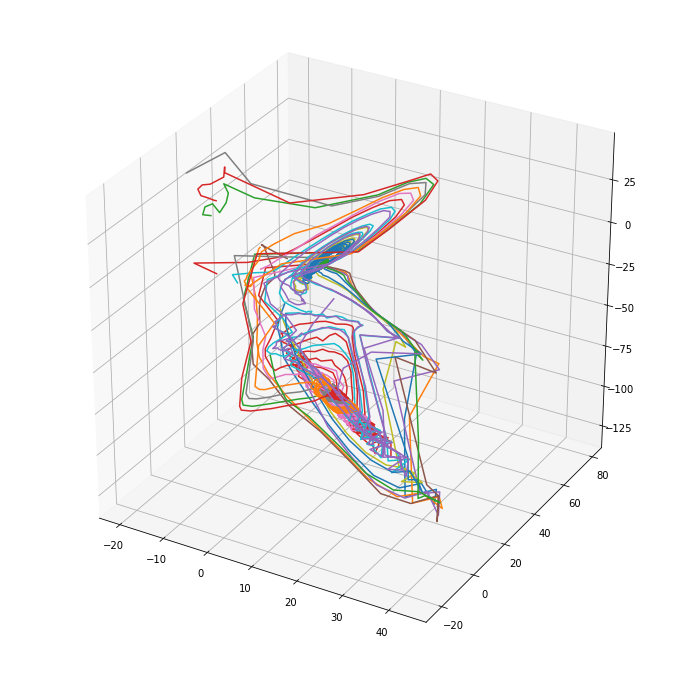

In [15]:
fig = plt.figure(figsize=(12, 12))
X = vind.eval(dataset, 'Recognition:loc', key='train')
ax1 = fig.add_subplot(111, projection='3d')
for i in range(0, 15):
    ax1.plot(X[i,:,2], X[i,:,0], X[i,:,1]) # <--- For the best view, you may need to try a different permutation of the axes (last index)

If you are unimpressed, well, you should be. It seems that the Lorenz attractor is there but the paths look jumpy and the attractor distorted. One should expect better of VIND!

## The VIND Fixed Point Iteration

VIND works by solving a recurrent equation for the latent paths using the fixed point iteration method. The means obtained from the recognition model, `'Recognition:loc'` are *not* the VIND inferred paths. But they do provide good initial points for launching the FPI. 

To be precise, the FPI is a set of the equations with the form

$$
X_1 = f(X_0, Y) \\
X_2 = f(X_1, Y) \\
...
$$

`'Recognition:loc'` gives $X_0$. To carry the FPI, the dataset must be augmented with these paths. This is done by assigning the starting paths to the `'train_StateSeq'` key, which is the key neurolib-VIND assigns to the latent state paths corresponding to training data. With the augmented dataset, the function $f$ - the FPI -  is evaluated by invoking the name `'Posterior:loc`'. Subsequently we update `'train_StateSeq'` with the obtained paths (see arXiv:1811.02459 for details) and evaluate `'Posterior:loc`' again. Replace, evaluate. 5 such fixed point iterations are carried below and the results are plotted next to the initial paths.

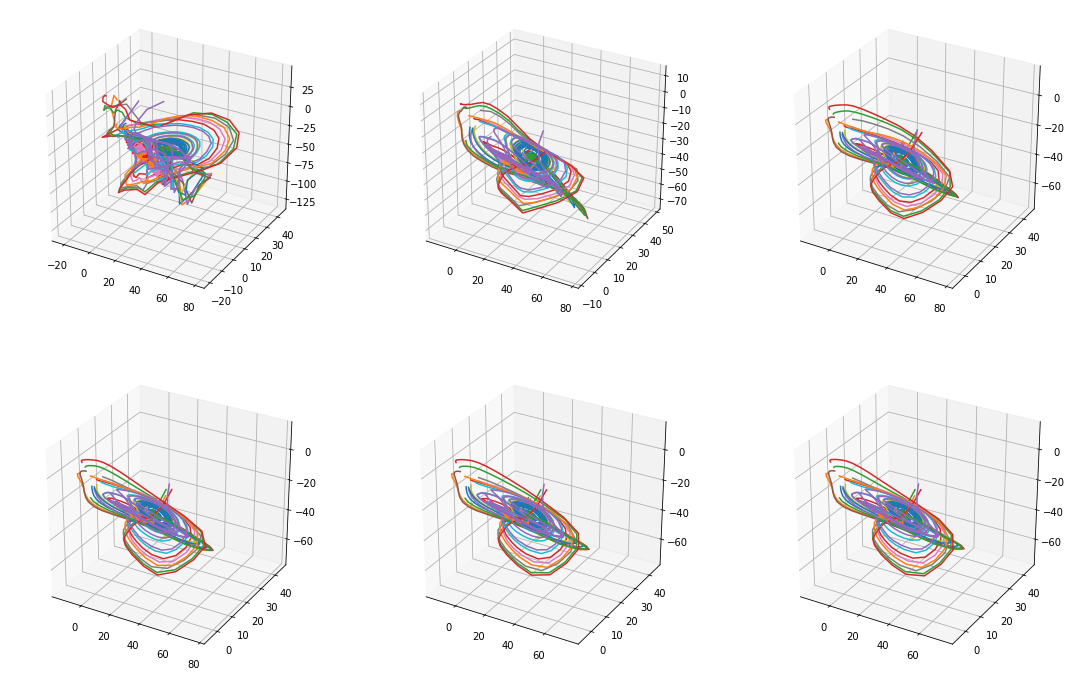

In [16]:
fig = plt.figure(figsize=(19, 12))
X = vind.eval(dataset, 'Recognition:loc', key='train')
ax1 = fig.add_subplot(231, projection='3d')
for i in range(0, 15):
    ax1.plot(X[i,:,0], X[i,:,2], X[i,:,1]) # <--- For the best view, you may need to try a different permutation of the axes (last index) here and below

dataset['train_StateSeq'] = X
X = vind.eval(dataset, 'Posterior:loc', key='train')
ax1 = fig.add_subplot(232, projection='3d')
for i in range(0, 15):
    ax1.plot(X[i,:,0], X[i,:,2], X[i,:,1])

dataset['train_StateSeq'] = X
X = vind.eval(dataset, 'Posterior:loc', key='train')
ax1 = fig.add_subplot(233, projection='3d')
for i in range(0, 15):
    ax1.plot(X[i,:,0], X[i,:,2], X[i,:,1])

dataset['train_StateSeq'] = X
X = vind.eval(dataset, 'Posterior:loc', key='train')
ax1 = fig.add_subplot(234, projection='3d')
for i in range(0, 15):
    ax1.plot(X[i,:,0], X[i,:,2], X[i,:,1])

dataset['train_StateSeq'] = X
X = vind.eval(dataset, 'Posterior:loc', key='train')
ax1 = fig.add_subplot(235, projection='3d')
for i in range(0, 15):
    ax1.plot(X[i,:,0], X[i,:,2], X[i,:,1])

dataset['train_StateSeq'] = X
X = vind.eval(dataset, 'Posterior:loc', key='train')
ax1 = fig.add_subplot(236, projection='3d')
for i in range(0, 15):
    ax1.plot(X[i,:,0], X[i,:,2], X[i,:,1])

Better? The smooth Lorenz attractor should be clearly seen in the latter plots. Empirically it is found that 2-3 fixed points iterations of VIND are enough to obtain good results. Cool! 

In fact, VIND provides a utility method `eval_posterior` to automate this task...

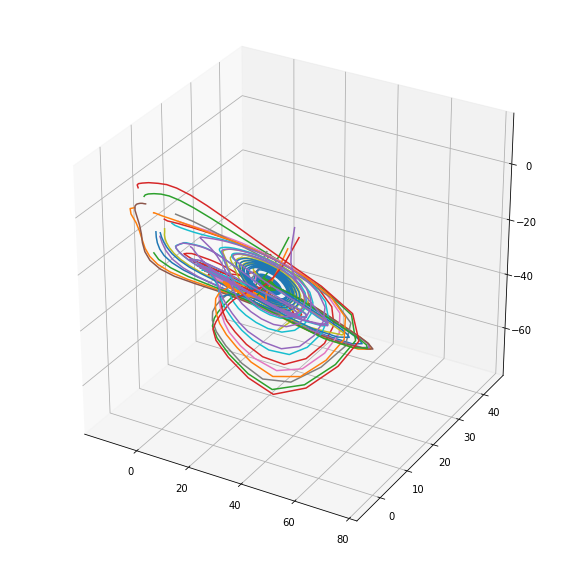

In [17]:
fig = plt.figure(figsize=(10, 10))
X = vind.eval_posterior(dataset, key='train')
ax1 = fig.add_subplot(111, projection='3d')
for i in range(0, 15):
    ax1.plot(X[i,:,0], X[i,:,2], X[i,:,1]) # <--- For the best view, you may need to try a different permutation of the axes (last index)

### Evaluating the trained dynamics

The paths found by VIND are fine and everything, but does VIND really find the underlying dynamics? Moreover, the model has been trained for only 20/25 epochs, this may be asking a bit too much...

To check whether VIND correctly finds the dynamics, two utility functions are defined below to compute the $k$-steps ahead $R^2$ measure (see arXiv:1811.02459 for details). The `eval` method of the model is again used, this time with the output name `Generative:prediction` which computes the prediction of the Generative Model of VIND on the augmented dataset (added `StateSeq` keys once the FPI is performed). To be sure, validation data is used, `key = 'valid'`.

In [18]:
import numpy as np
def compute_R2_from_sequences(data,
                              preds,
                              axis=None):
    """
    R2 for a sequence
    """
    mean = np.mean(data, axis=1, keepdims=True)
    d = np.sum((data - mean)**2)
    n = np.sum((data - preds)**2, axis=axis)
    return 1.0 - n/d 

def anal_kR2(dataset, key='valid', steps=10):
    """
    Compute the k-steps ahead R2 between the data produced by the Generative
    Model and the Observations
    """
    kR2 = np.zeros(10)
    obs = dataset[key + '_Observation']
    zpath = vind.eval(dataset, 'Recognition:loc', key=key)
    dataset[key + '_StateSeq'] = zpath
    zpath = vind.eval(dataset, 'Posterior:loc', key=key)
    dataset[key + '_StateSeq'] = zpath
    zpath = vind.eval(dataset, 'Posterior:loc', key=key)
    dataset[key + '_StateSeq'] = zpath
    zpath = vind.eval(dataset, 'Posterior:loc', key=key)
    dataset[key + '_StateSeq'] = zpath

    preds = vind.eval(dataset, 'Generative:prediction', key=key)
    R2 = compute_R2_from_sequences(obs[:,:], preds[:,:])
    kR2[0] = R2
    for k in range(1,steps):
        preds = vind.eval(dataset, 'Generative:prediction', key=key)
        R2 = compute_R2_from_sequences(obs[:,k:], preds[:,k:])
        zpath = vind.eval(dataset, 'LLDS:loc', key=key)
        dataset[key + '_StateSeq'] = zpath
        kR2[k] = R2

    return kR2

anal_kR2(dataset)

array([0.98117566, 0.98210944, 0.97971206, 0.96855464, 0.94691581,
       0.90818923, 0.8456191 , 0.76126766, 0.64853829, 0.50377856])

In good runs, even with only 20-25 epochs, VIND does decently at predicting the data several steps ahead. Otherwise, just let it train a little longer!

To simplify life for the user, one can obtain the $kR^2$ result simply by calling the `anal_kR2` from the model, like so

In [19]:
print(vind.anal_kR2(dataset))

[0.98117566 0.98210944 0.97971206 0.96855464 0.94691581 0.90818923
 0.8456191  0.76126766 0.64853829 0.50377856]
